                           # SUPERVISED LEARNING     
                         # TYPE:REGRESSION LEARNING

# PROJECT TITLE : Banglore House Price Prediction dataset                                       using Regression Learning Algorithm.

In [ ]:
--MODEL Which predicts and guides about house with features like area,availability,location,size,society,bathroom,balcony 
  and price as output.
1.INPUT COLUMNS : AREA_TYPE,Availability,Location,Size,Society,Total_sqft,Bathroom and Balcony
2.OUTPUT COLUMN : Price in lakhs

In [1]:
import pandas as pd   # for data cleaning
import numpy as np

In [2]:
df=pd.read_csv("E:\DATA SCIENCE\JANUARY\Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape  # 13320 rows and 9 columns

(13320, 9)

# DATA CLEANING :

In [ ]:
1.first we need to remove non important columns like availability,society,balcony,area_type

In [5]:
df.groupby("area_type")['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df1=df.drop(['area_type','availability','society','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()  # null values reduced in df1

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1.dropna(inplace=True)# by droping  null values as count is less 
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df1.shape   # 13246 rows and 5 columns

(13246, 5)

In [11]:
df1['size'].unique()  # to check all unique values

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
here check and observe datatype is object 2 BHK,2 Bedroom,1RK 
which is not appropiate we need only 2 instead of 2BHK

Method1:

In [12]:
s='2 BHK'
int(s.split(' ')[0])

2

In [13]:
s='2BHK'  # here no space betw 2 and B so how to get only int 2  as output
int(s[0])

2

In [ ]:
Method:2 CORRECT METHOD

In [ ]:
split method works only for string and not for series datatype

for series use apply lambda function

In [14]:
type(df1['size'])

pandas.core.series.Series

In [15]:
df1['size']=df1['size'].apply(lambda x:int(x.split(' ')[0]))

In [16]:
df1    # Observe size column 

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [17]:
df1['size'].unique()  
# here check that size and data type is 11,7,27,43,14,12,13,18 BHK which is wrong 

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df1[df1['size'] > 10]  # check number of bedrooms and price with total sqft
# Observe ERROR

,location,size,total_sqft,bath,price
459,1 Giri Nagar,11,5000,9.0,360.0
1718,2Electronic City Phase II,27,8000,27.0,230.0
1768,1 Ramamurthy Nagar,11,1200,11.0,170.0
3379,1Hanuman Nagar,19,2000,16.0,490.0
3609,Koramangala Industrial Layout,16,10000,16.0,550.0
3853,1 Annasandrapalya,11,1200,6.0,150.0
4684,Munnekollal,43,2400,40.0,660.0
4916,1Channasandra,14,1250,15.0,125.0
6533,Mysore Road,12,2232,6.0,300.0
7979,1 Immadihalli,11,6000,12.0,150.0


In [ ]:
now focus on total_area samples and bathrooms
--see output where it is in range 123.25 (934-1432) and object data type
--convert object into int

In [19]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
Defining a function:

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
is_float('1526')

True

In [22]:
is_float('1526 - 2514')

False

In [23]:
df1[df1['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
5,Whitefield,2,1170,2.0,38.00
6,Old Airport Road,4,2732,4.0,204.00
7,Rajaji Nagar,4,3300,4.0,600.00
8,Marathahalli,3,1310,3.0,63.25
9,Gandhi Bazar,6,1020,6.0,370.00


In [24]:
df1[~df1['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [ ]:
df['total_sqft'] is still object and need to change to int
like  1100Sq. Yards , 34.46Sq. Meter will be removed as these are very few data
and values like 1160 - 1195 will be converted to AVERAGE for simplicity

In [26]:
def convert(x): # convert sqft to int/float
    l=x.split(' - ')
    if len(l) == 2:
        return ((float(l[0]) + float(l[1]))/2)
    try:
        return float(x)   
    except:
        return None

In [27]:
convert('1234 - 2541')

1887.5

In [28]:
convert('34.46Sq. Meter') # do not retuan anything

In [29]:
df1.sample(15)

,location,size,total_sqft,bath,price
2790,Whitefield,3,1800,3.0,110.00
3362,Kaggalipura,2,1000,2.0,60.00
2107,Bommasandra Industrial Area,3,1320,2.0,38.12
5807,Sarjapur Road,3,1755,3.0,122.00
7138,1st Block Jayanagar,3,1200,2.0,130.00
7045,Thanisandra,3,1370,2.0,61.00
3147,Electronics City Phase 1,3,1515,2.0,80.91
13032,Hosur Road,2,1223,2.0,93.00
1838,Old Madras Road,4,3630,6.0,195.00
9866,Brookefield,3,1750,2.0,75.00


In [30]:
df1['total_sqft']=df1['total_sqft'].apply(convert)

In [31]:
df1.head(10) # object to float or int in total_sqft

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
5,Whitefield,2,1170.0,2.0,38.00
6,Old Airport Road,4,2732.0,4.0,204.00
7,Rajaji Nagar,4,3300.0,4.0,600.00
8,Marathahalli,3,1310.0,3.0,63.25
9,Gandhi Bazar,6,1020.0,6.0,370.00


In [32]:
df1.info() # total_sqft and size converted to float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int64  
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


# FEATURE ENGG:

In [ ]:
price_per_sqft a new column with price/total_sqft

In [33]:
df1['price_per_sqft']= (df1['price']*100000)/df1['total_sqft']

In [34]:
df1.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [ ]:
so here how to sort location column 
like number of flats in a location 
sort all those flat which are less in count make 'other'name column with below 10  flats

In [35]:
len(df1.location.unique()) # 1304 is unique values of location

1304

In [36]:
df1.location=df1.location.apply(lambda x : x.strip())
locatn_stats=df1.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [ ]:
----       now find locations with less than 10 flat

In [37]:
locatn_stats  # see flats with maximum location

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [38]:
less_than_10=locatn_stats[locatn_stats<=10]
len(less_than_10)             # all locations with less than 10 flats

1052

In [39]:
less_than_10 #Length: 1051

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [ ]:
so out of 1304 these 1051 are those locations with less tha 10 flats and will be shown in "other" name column and we need only 253 new columns
where rarely anyone buys house 

then make names in string remove roman numbers if availble and remove space

In [40]:
df1['location']=df1['location'].apply(lambda x:str(x))

In [41]:
df1['location']=df1['location'].apply(lambda x:x.strip())

In [42]:
df1['location']=df1['location'].apply(lambda x:'others' if x in less_than_10 else x)

In [43]:
df1.groupby('location')['location'].agg('count').sort_values(ascending = False)  # others 2881

location
others              2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [44]:
len(df1.location.unique())

242

In [45]:
df1.sample(5)  # check location "others"

,location,size,total_sqft,bath,price,price_per_sqft
5708,Jigani,4,NaN,3.0,160.0,NaN
5969,Sompura,2,1126.0,2.0,39.0,3463.587922
5328,Malleshwaram,2,1290.0,2.0,120.0,9302.325581
371,Kodigehaali,2,1166.0,2.0,55.0,4716.981132
12226,Varthur,2,1000.0,1.0,65.0,6500.000000


# OUTLIER DECTECTION AND REMOVAL:

In [ ]:
sometimes there are not data errors but it represents extreme vairation in the dataset 
although they are valid but it makes sense to remove them and could create issue later on.
for eg 600 totalsqft with 5BHk,2BHK HAVE 13 bathrooms or 7 balconies which is unreal where price also varies

In [46]:
df1.shape

(13246, 6)

In [47]:
df1[df1['total_sqft']/df1['size'] < 300] # see price per sqft

,location,size,total_sqft,bath,price,price_per_sqft
9,others,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,others,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,others,7,1400.0,7.0,218.0,15571.428571
13279,others,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [48]:
df2=df1[~(df1['total_sqft']/df1['size'] < 300)]

In [49]:
df2.shape

(12502, 6)

In [50]:
df2.price_per_sqft.describe() # basic statustic on that perticular column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
--   Price per sqft is extremly high so by using std deviation and mean to remove these outliers

In [51]:
def remove_pps_outliers(df): # df(input) is passed in remove_pps function
    df_out=pd.DataFrame() # new blank dataframe
    for keys,subdf in df.groupby('location'):
        #print (keys) keys are names of locations
        #print (subdf) subdf are single sub dataframe
        m = np.mean(subdf['price_per_sqft'])
        s = np.std(subdf['price_per_sqft']) # std deviation
        reduced_df = subdf[(subdf['price_per_sqft']>(m-s)) & (subdf['price_per_sqft'] <= (m+s))]
# print(reduced_df) anything above  mean - std and below mean+std keep those in reduced dataframe
        df_out=pd.concat([df_out,reduced_df],ignore_index =True)
        # print(df_out)
    return df_out  # output dataframe

In [52]:
df3=remove_pps_outliers(df1)

In [53]:
df3.shape

(11428, 6)

# PLOT HISTOGRAM:

In [54]:
import matplotlib.pyplot as plt
import matplotlib

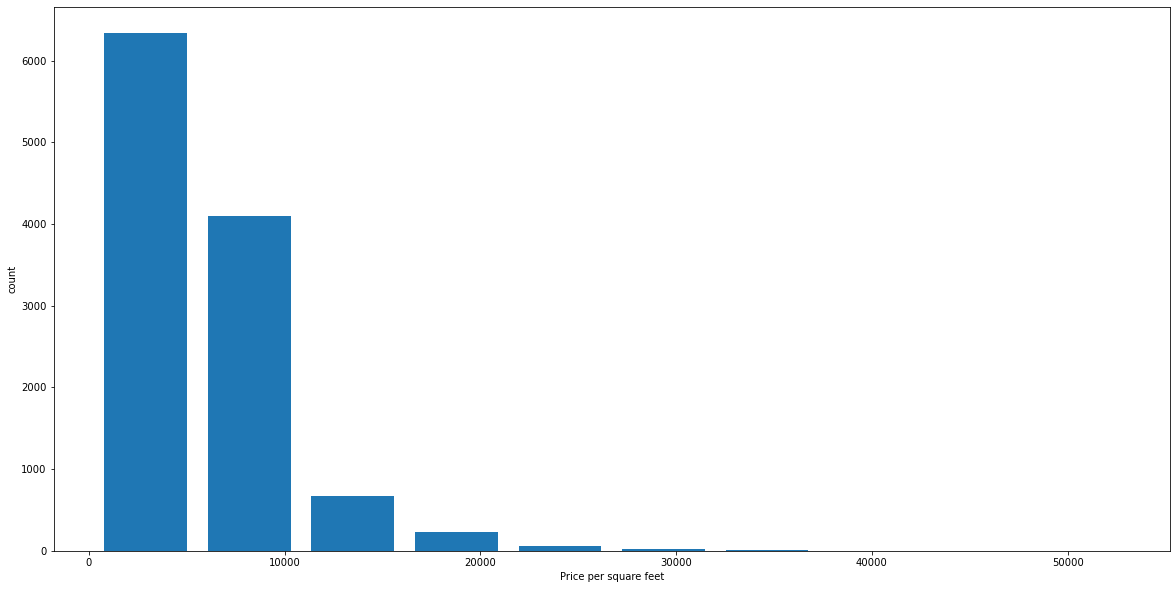

In [55]:
matplotlib .rcParams['figure.figsize']=(20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('count')
plt.show()

In [56]:
df3.bath.unique()   # how 18 13 16 bathroom are possible which is outliers

array([ 4.,  3.,  6.,  2.,  5.,  8.,  1.,  7.,  9., 10., 12., 14., 27.,
       11., 16., 15., 13., 18.])

In [57]:
df3[df3['bath'] > 10]  # more than 10 bath rooms

,location,size,total_sqft,bath,price,price_per_sqft
5645,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8812,others,9,3300.0,14.0,500.0,15151.515152
8946,others,27,8000.0,27.0,230.0,2875.000000
8956,others,11,1200.0,11.0,170.0,14166.666667
9007,others,8,990.0,12.0,120.0,12121.212121
9238,others,10,12000.0,12.0,525.0,4375.000000
9294,others,19,2000.0,16.0,490.0,24500.000000
9346,others,16,10000.0,16.0,550.0,5500.000000
9631,others,14,1250.0,15.0,125.0,10000.000000
10280,others,11,6000.0,12.0,150.0,2500.000000


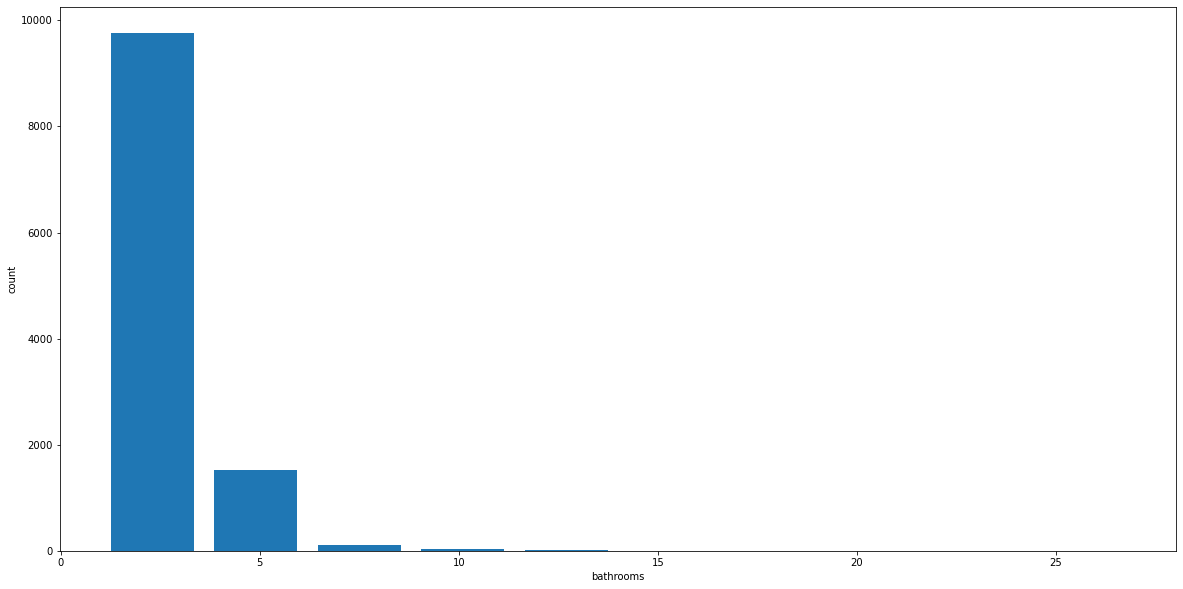

In [58]:
matplotlib .rcParams['figure.figsize']=(20,10)
plt.hist(df3.bath,rwidth=0.8) # width of the bar 
plt.xlabel('bathrooms')  # watch outliers
plt.ylabel('count')
plt.show()

In [ ]:
here number of bath rooms are more like 14, 12 that needs to be fixed:

In [59]:
df3[df3['bath'] > df3['size'] + 2]   # all these are outliers and remove them

,location,size,total_sqft,bath,price,price_per_sqft
1635,Chamrajpet,6,1500.0,9.0,230.0,15333.333333
1771,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5604,Nagasandra,4,7000.0,8.0,450.0,6428.571429
7229,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8812,others,9,3300.0,14.0,500.0,15151.515152
9007,others,8,990.0,12.0,120.0,12121.212121
9149,others,6,11338.0,9.0,1000.0,8819.897689
10308,others,8,1850.0,12.0,300.0,16216.216216
10693,others,3,2400.0,6.0,775.0,32291.666667
10700,others,6,1200.0,9.0,122.0,10166.666667


In [60]:
df4=df3[df3['bath'] < df3['size']+2] 
df4

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.00,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.00,9139.784946
...,...,...,...,...,...,...
11423,others,1,812.0,1.0,26.00,3201.970443
11424,others,3,1440.0,2.0,63.93,4439.583333
11425,others,2,1075.0,2.0,48.00,4465.116279
11426,others,4,1200.0,5.0,325.00,27083.333333


In [61]:
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.0,9139.784946


In [62]:
df4.shape

(11301, 6)

In [63]:
df4.drop("price_per_sqft",axis=1,inplace=True)

C:\Users\Comp\AppData\Local\Temp\ipykernel_15632\3493820495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop("price_per_sqft",axis=1,inplace=True)


In [64]:
df4.head()

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,6,1200.0,6.0,125.0
3,1st Block Jayanagar,3,1875.0,2.0,235.0
4,1st Block Jayanagar,7,930.0,4.0,85.0


In [65]:
df4.shape

(11301, 5)

#                           Use One Hot Encoding For Location :

In [66]:
final=pd.get_dummies(data=df4,columns= ['location'],drop_first=True)
final

,size,total_sqft,bath,price,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,4,2850.0,4.0,428.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1200.0,6.0,125.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1875.0,2.0,235.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,930.0,4.0,85.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,1,812.0,1.0,26.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11424,3,1440.0,2.0,63.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11425,2,1075.0,2.0,48.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11426,4,1200.0,5.0,325.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
final.shape

(11301, 245)

# Model Building :

In [68]:
X = final.drop(['price'],axis='columns')
X.head(3)

,size,total_sqft,bath,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,4,2850.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1200.0,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X.shape

(11301, 244)

In [70]:
y = final.price
y.head(3)

0    428.0
1    194.0
2    125.0
Name: price, dtype: float64

In [71]:
len(y)

11301

In [ ]:
we divide data into training and testing dataset for model training we use train dataset and 
for model perfomance we use test dataset
test_size  = 0.2 means 20% are for testing samples and remaining 80% are for model-training purpose.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
X_train.shape

(9040, 244)

In [74]:
X_test.shape

(2261, 244)

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
model.score(X_test,y_test)

0.6102450863399529

In [ ]:
By using linear regression we got accuracy of 61% 
Try with other models also to check more score improvement.

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)  # cv is cross validation

array([0.46547937, 0.28788278, 0.43290302, 0.60907635, 0.49240757])

In [ ]:
We can see that in 5 iterations we get a score sround 50% all the time. 
This is pretty good but we want to test few other algorithms for regression to see 
if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Comp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Comp\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

,model,best_score,best_params
0,linear_regression,0.457550,{'normalize': True}
1,lasso,0.412761,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.423866,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties price prediction 
returns estimated price

In [80]:
X.columns   # for location names

Index(['size', 'total_sqft', 'bath', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_others'],
      dtype='object', length=244)

In [81]:
def predict_price(location,size,total_sqft,bath):    
    loc_index = np.where(X.columns==location)[0][0]  # gives column index as output

    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = total_sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0] 

In [ ]:
---            OBSERVE PRICE PREDICTION

In [82]:
predict_price('location_1st Phase JP Nagar',2,1000,2)  #location,size,total_sqft,bath

C:\Users\Comp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.00377328410609

In [83]:
predict_price('location_1st Phase JP Nagar',3,1000,2) #location,size,total_sqft,bath

C:\Users\Comp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.7835641128712

In [84]:
predict_price('location_Indira Nagar',2,1000,2) #location,size,total_sqft,bath

C:\Users\Comp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


171.47196362021776

In [ ]:
                          CONCLUSION FOR PRICE PREDICTION 
1.APARTMENT with 2 bedroom and 2 bathrooms cost more that apartment with 3 bedrooms and 2 bathrooms 
  reasons could be size issues and somebody dont like smaller size of bedrooms
2.Data is distributed widely spreaded thats why.
    

# Export the tested model to a pickle file :

In [85]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)  # model is linear regression

# Export location and column information to a file that will be useful later on in our prediction application

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))